In [11]:
from keras.datasets import imdb
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [12]:
num_word = 10000
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=num_word)

In [13]:
def vectorize_sequences(sequences):
    
    arr = np.zeros((len(sequences), num_word))
    for idx, sequence in enumerate(sequences):
        arr[idx, sequence] = 1
    return arr

In [14]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [15]:
def build_model():
    model = Sequential()
    model.add(Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(num_word,)))
    model.add(Dropout(0.5))
    model.add(Dense(4, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [16]:
model = build_model()
model.compile(optimizer='RMSprop', 
              loss='mean_squared_error',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.3)

Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 5s - loss: 0.2364 - acc: 0.5639 - val_loss: 0.1864 - val_acc: 0.8567
Epoch 2/10
17500/17500 [==============================] - 4s - loss: 0.2096 - acc: 0.6229 - val_loss: 0.1558 - val_acc: 0.8603
Epoch 3/10
17500/17500 [==============================] - 4s - loss: 0.1997 - acc: 0.6828 - val_loss: 0.1348 - val_acc: 0.8629
Epoch 4/10
17500/17500 [==============================] - 4s - loss: 0.1961 - acc: 0.6927 - val_loss: 0.1381 - val_acc: 0.8613
Epoch 5/10
17500/17500 [==============================] - 4s - loss: 0.1946 - acc: 0.6923 - val_loss: 0.1382 - val_acc: 0.8537
Epoch 6/10
17500/17500 [==============================] - 4s - loss: 0.1959 - acc: 0.6916 - val_loss: 0.1355 - val_acc: 0.8563
Epoch 7/10
17500/17500 [==============================] - 4s - loss: 0.1947 - acc: 0.6979 - val_loss: 0.1371 - val_acc: 0.8443
Epoch 8/10
17500/17500 [==============================] - 4s -

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


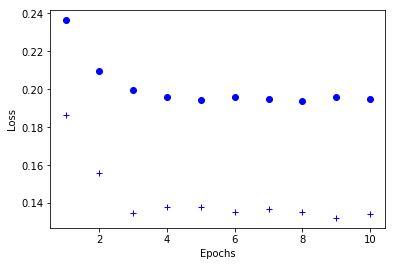

In [17]:
history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

24736/25000 [============================>.] - ETA: 0s

In [19]:
test_loss, test_accuracy

(0.13568573609352111, 0.83899999999999997)